In [12]:
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
import pandas as pd
import random
from sklearn.metrics.pairwise import cosine_similarity
#UBCF (User-Based Collaborative Filtering)
#Based on what other users liked
#Recommended system while using KNN

In [18]:
users = list(range(1,101))
items = list(range(102,201))
data = {'user_id' : [], 'item_id' : [], 'ratings' : []}
for user in users:
  rated_items = random.sample(items ,k = 8)
  for item in rated_items:
    data['user_id'].append(user)
    data['item_id'].append(item)
    data['ratings'].append(random.randint(1,5))
df = pd.DataFrame(data)

In [7]:
#To CSV
df.to_csv('small_recommendation_engine_data.csv', index = False)
print("Created")

Created


In [19]:
df.head(10)

user_id  item_id  ratings
0        1      192        5
1        1      123        5
2        1      112        3
3        1      188        2
4        1      193        1
5        1      117        5
6        1      161        2
7        1      157        5
8        2      117        2
9        2      186        1

In [20]:
#Pivot table
user_item_matrix = df.pivot(index = 'user_id', columns = 'item_id', values = 'ratings').fillna(0)
print(user_item_matrix.head(10))

item_id  102  103  104  105  106  107  108  109  110  111  ...  191  192  193  \
user_id                                                    ...                  
1        0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  ...  0.0  5.0  1.0   
2        0.0  0.0  3.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  ...  0.0  0.0  0.0   
3        2.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  ...  0.0  0.0  0.0   
4        0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  ...  0.0  0.0  0.0   
5        0.0  5.0  0.0  5.0  0.0  0.0  5.0  0.0  0.0  0.0  ...  0.0  0.0  0.0   
6        4.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  ...  0.0  0.0  0.0   
7        0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  1.0  0.0  ...  0.0  0.0  0.0   
8        0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  ...  0.0  0.0  0.0   
9        5.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  ...  0.0  4.0  0.0   
10       0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  5.0  ...  0.0  0.0  1.0   

item_id  194  195  196  197

In [21]:
user_item_matrix.head(10)

item_id  102  103  104  105  106  107  108  109  110  111  ...  191  192  193  \
user_id                                                    ...                  
1        0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  ...  0.0  5.0  1.0   
2        0.0  0.0  3.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  ...  0.0  0.0  0.0   
3        2.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  ...  0.0  0.0  0.0   
4        0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  ...  0.0  0.0  0.0   
5        0.0  5.0  0.0  5.0  0.0  0.0  5.0  0.0  0.0  0.0  ...  0.0  0.0  0.0   
6        4.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  ...  0.0  0.0  0.0   
7        0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  1.0  0.0  ...  0.0  0.0  0.0   
8        0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  ...  0.0  0.0  0.0   
9        5.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  ...  0.0  4.0  0.0   
10       0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  5.0  ...  0.0  0.0  1.0   

item_id  194  195  196  197  198  199  200  
user_id                                     
1        0.0  0.0  0.0  0.0  0.0  0.0  0.0  
2        0.0  1.0  0.0  0.0  0.0  0.0  0.0  
3        0.0  0.0  0.0  0.0  0.0  0.0  0.0  
4        0.0  0.0  0.0  0.0  0.0  0.0  0.0  
5        0.0  0.0  0.0  0.0  0.0  0.0  0.0  
6        2.0  0.0  0.0  0.0  0.0  2.0  0.0  
7        0.0  0.0  0.0  0.0  0.0  0.0  0.0  
8        0.0  0.0  0.0  3.0  0.0  0.0  0.0  
9        0.0  0.0  0.0  0.0  0.0  0.0  0.0  
10       0.0  0.0  0.0  2.0  0.0  0.0  0.0  

[10 rows x 99 columns]

In [22]:
#Cosine similarity
similarity = cosine_similarity(user_item_matrix)
similarity_df = pd.DataFrame(similarity, index = user_item_matrix.index, columns = user_item_matrix.index)
print(similarity_df.head(10))

user_id       1         2         3         4         5         6         7    \
user_id                                                                         
1        1.000000  0.113315  0.128906  0.000000  0.000000  0.203321  0.280446   
2        0.113315  1.000000  0.068945  0.096118  0.000000  0.000000  0.000000   
3        0.128906  0.068945  1.000000  0.000000  0.000000  0.123708  0.000000   
4        0.000000  0.096118  0.000000  1.000000  0.000000  0.137972  0.000000   
5        0.000000  0.000000  0.000000  0.000000  1.000000  0.089253  0.071368   
6        0.203321  0.000000  0.123708  0.137972  0.089253  1.000000  0.087762   
7        0.280446  0.000000  0.000000  0.000000  0.071368  0.087762  1.000000   
8        0.000000  0.000000  0.000000  0.243856  0.000000  0.000000  0.000000   
9        0.186940  0.000000  0.255918  0.174427  0.000000  0.224252  0.080692   
10       0.067552  0.000000  0.000000  0.000000  0.000000  0.173646  0.000000   

user_id       8         9  

In [23]:
similarity_df.head(10)

user_id       1         2         3         4         5         6         7    \
user_id                                                                         
1        1.000000  0.113315  0.128906  0.000000  0.000000  0.203321  0.280446   
2        0.113315  1.000000  0.068945  0.096118  0.000000  0.000000  0.000000   
3        0.128906  0.068945  1.000000  0.000000  0.000000  0.123708  0.000000   
4        0.000000  0.096118  0.000000  1.000000  0.000000  0.137972  0.000000   
5        0.000000  0.000000  0.000000  0.000000  1.000000  0.089253  0.071368   
6        0.203321  0.000000  0.123708  0.137972  0.089253  1.000000  0.087762   
7        0.280446  0.000000  0.000000  0.000000  0.071368  0.087762  1.000000   
8        0.000000  0.000000  0.000000  0.243856  0.000000  0.000000  0.000000   
9        0.186940  0.000000  0.255918  0.174427  0.000000  0.224252  0.080692   
10       0.067552  0.000000  0.000000  0.000000  0.000000  0.173646  0.000000   

user_id       8         9         10   ...       91        92        93   \
user_id                                ...                                 
1        0.000000  0.186940  0.067552  ...  0.000000  0.000000  0.167377   
2        0.000000  0.000000  0.000000  ...  0.000000  0.244252  0.000000   
3        0.000000  0.255918  0.000000  ...  0.093678  0.000000  0.000000   
4        0.243856  0.174427  0.000000  ...  0.000000  0.118056  0.227162   
5        0.000000  0.000000  0.000000  ...  0.000000  0.254567  0.000000   
6        0.000000  0.224252  0.173646  ...  0.073878  0.166957  0.000000   
7        0.000000  0.080692  0.000000  ...  0.000000  0.000000  0.000000   
8        1.000000  0.198175  0.061381  ...  0.000000  0.175206  0.212924   
9        0.198175  1.000000  0.000000  ...  0.000000  0.000000  0.046152   
10       0.061381  0.000000  1.000000  ...  0.140259  0.000000  0.000000   

user_id       94        95        96        97        98        99        100  
user_id                                                                        
1        0.000000  0.000000  0.175547  0.000000  0.092521  0.000000  0.000000  
2        0.024742  0.000000  0.093891  0.000000  0.000000  0.071545  0.000000  
3        0.168880  0.000000  0.213618  0.000000  0.422200  0.000000  0.151051  
4        0.000000  0.133185  0.000000  0.128310  0.000000  0.127084  0.000000  
5        0.361020  0.239325  0.085623  0.000000  0.054153  0.000000  0.000000  
6        0.000000  0.047088  0.000000  0.000000  0.277470  0.051350  0.029781  
7        0.039936  0.000000  0.075774  0.060456  0.000000  0.092384  0.053580  
8        0.000000  0.000000  0.000000  0.240535  0.098082  0.000000  0.000000  
9        0.000000  0.000000  0.154895  0.000000  0.163274  0.047213  0.027382  
10       0.000000  0.000000  0.000000  0.000000  0.200178  0.000000  0.000000  

[10 rows x 100 columns]

<Axes: xlabel='user_id', ylabel='user_id'>

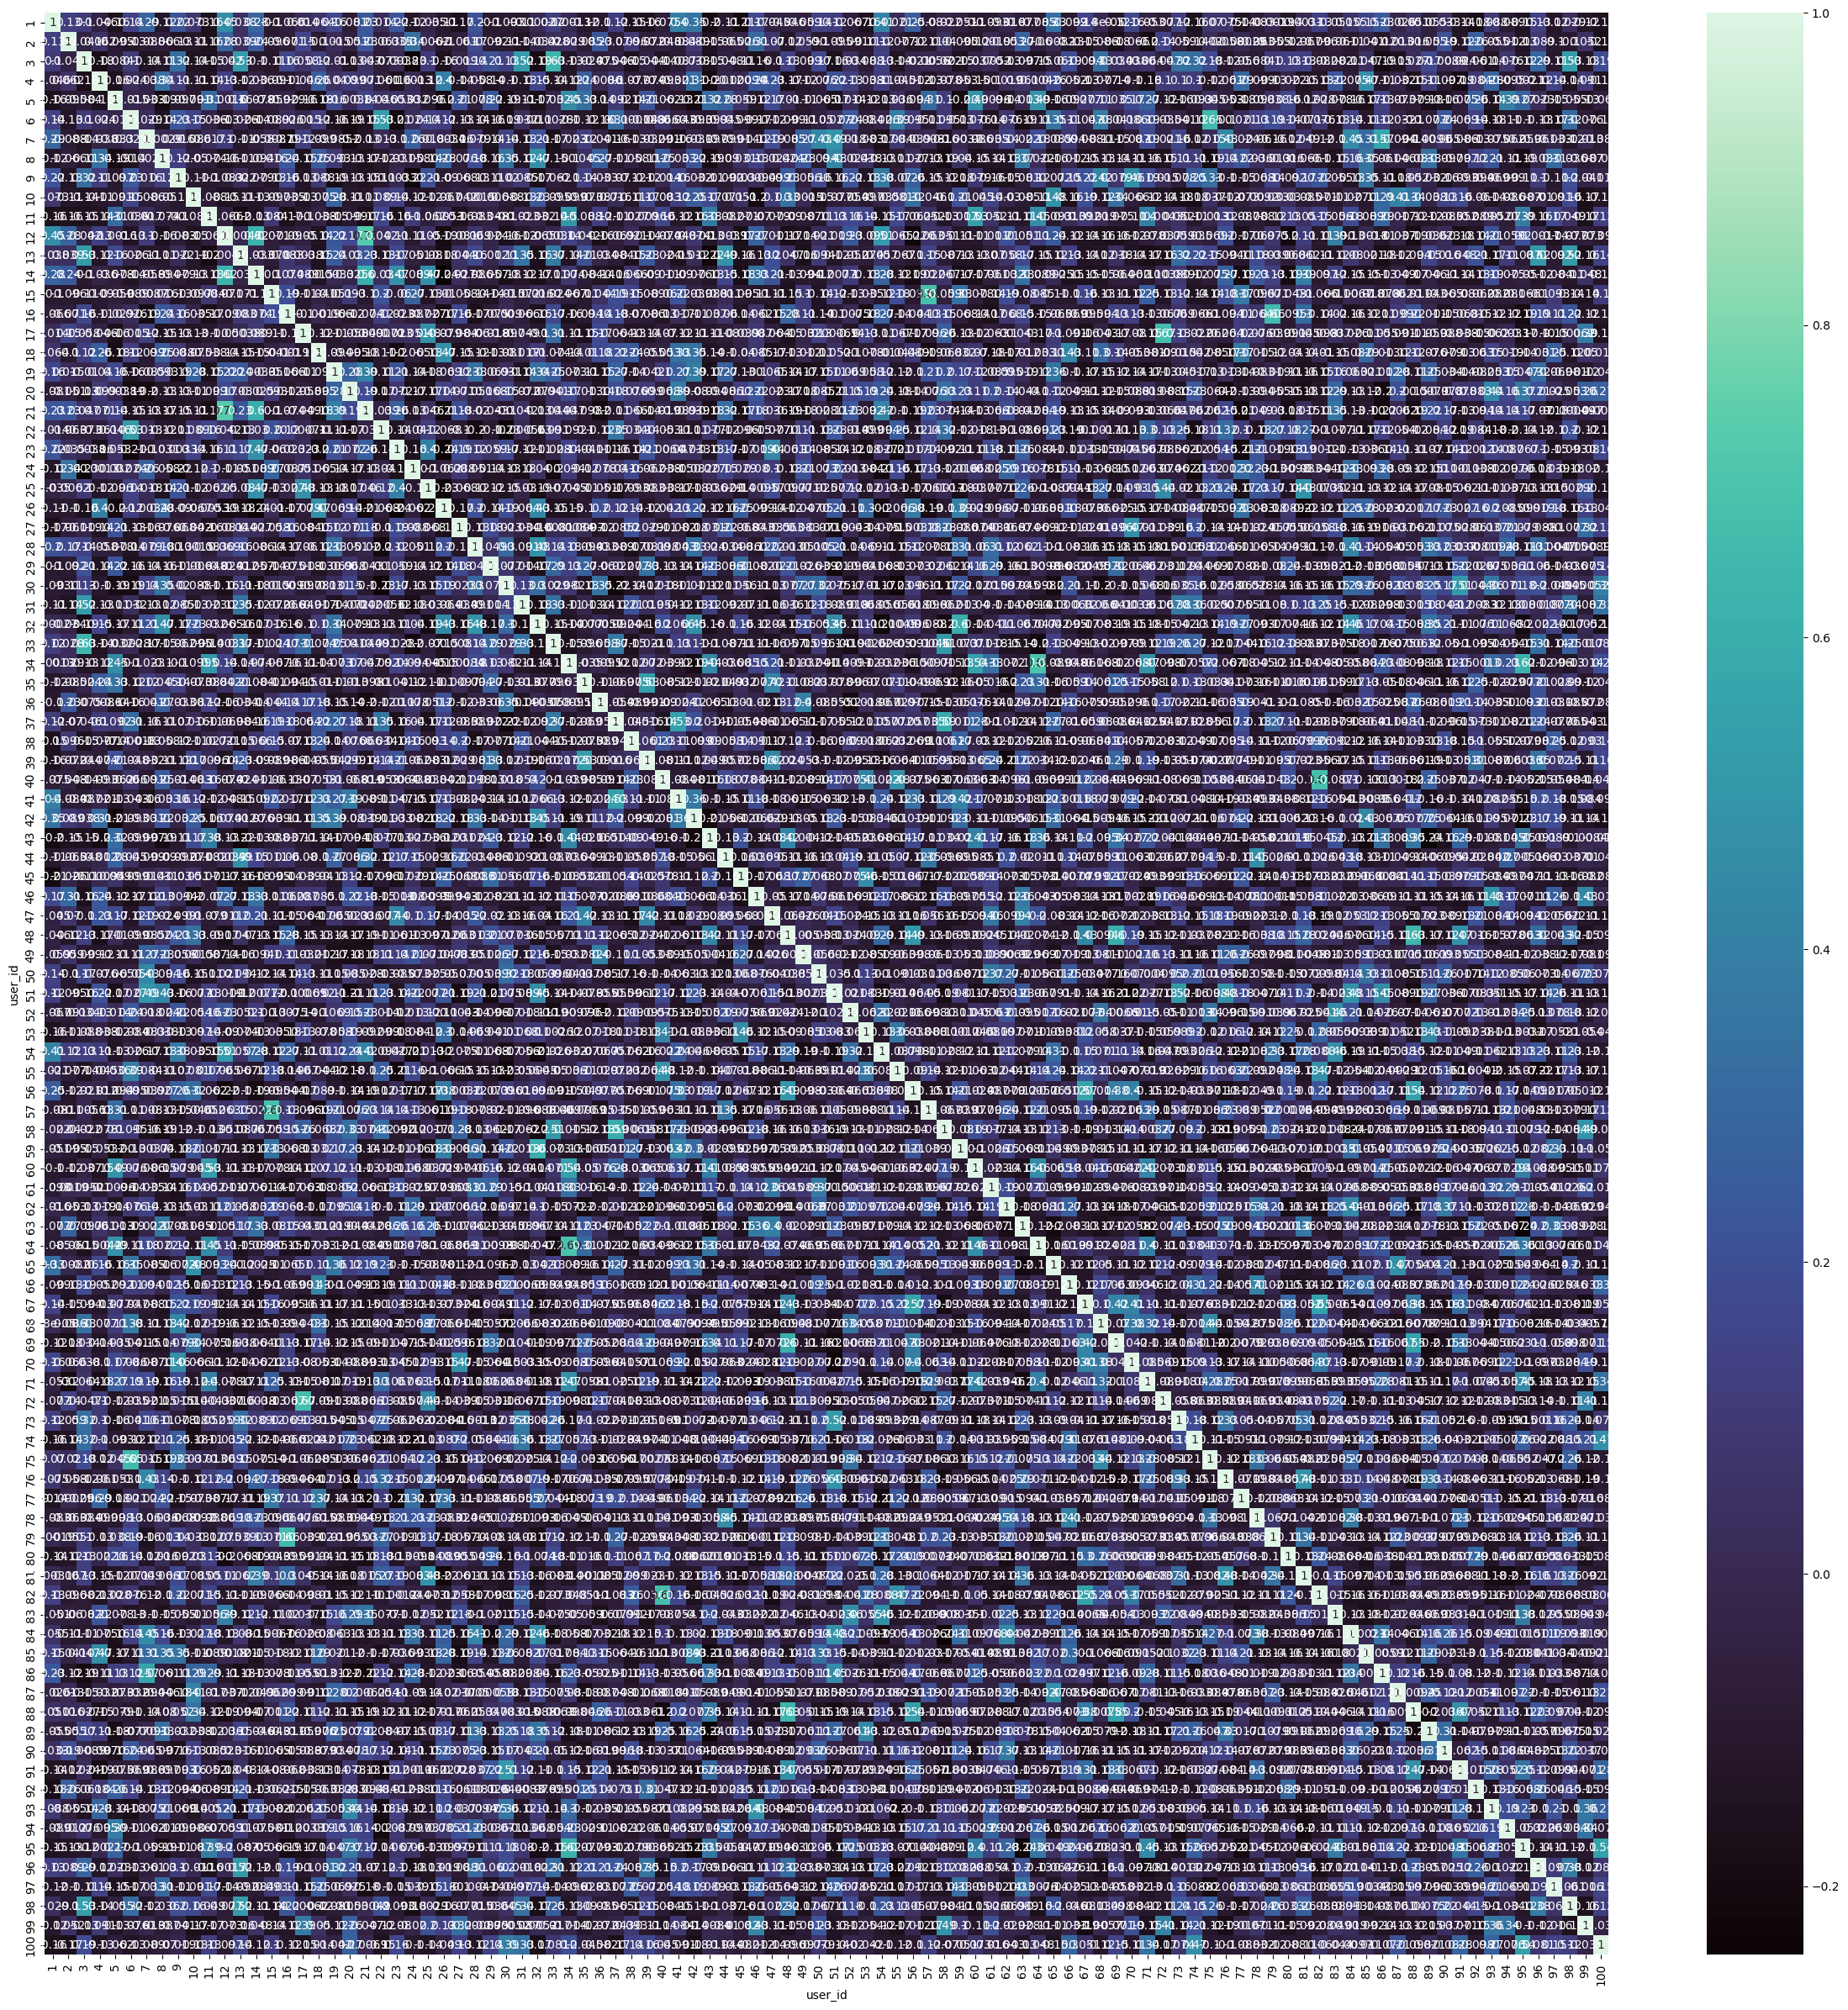

In [36]:
plt.figure(figsize = (30,30))
sns.heatmap(similarity_df.corr(), annot = True, cmap = 'mako')

In [32]:
def recommend_items(user_id, k = 3, top_n = 5):
  #Find similar users
  similar_users = similarity_df[user_id].sort_values(ascending = False)[1:k+1].index
  similar_ratings = user_item_matrix.loc[similar_users].mean().sort_values(ascending = False)
  rated_items = user_item_matrix.loc[user_id]
  recommendation = similar_ratings.drop(rated_items[rated_items > 0].index, errors = 'ignore]')
  return recommendation.head(top_n)
print(recommend_items(19))

item_id
180    2.000000
104    1.666667
126    1.666667
196    1.666667
123    1.333333
dtype: float64
